**Importing Libraries**

## Cartoon filter 

In [20]:
import cv2
from google.colab.patches import cv2_imshow

from google.colab import files
uploaded = files.upload()
img = cv2.imread('gg.jpg')


Saving gg.jpg to gg (1).jpg


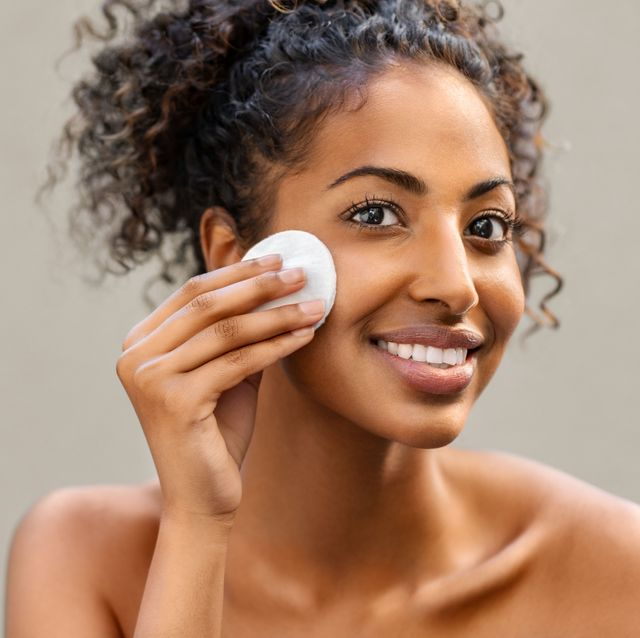

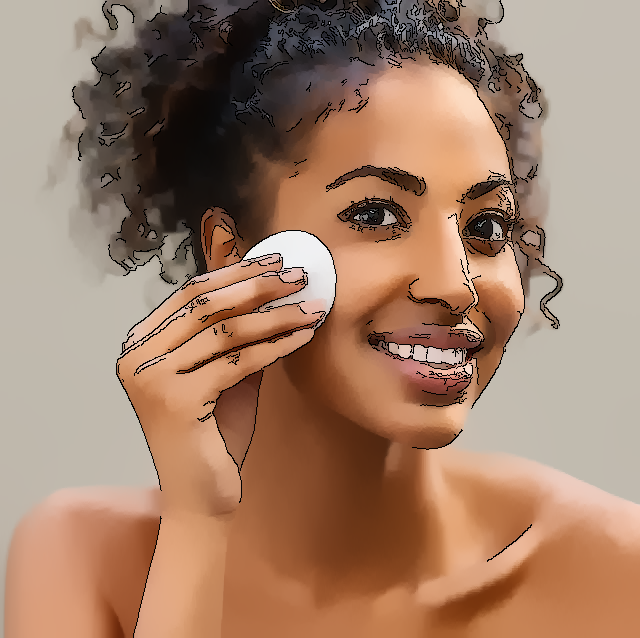

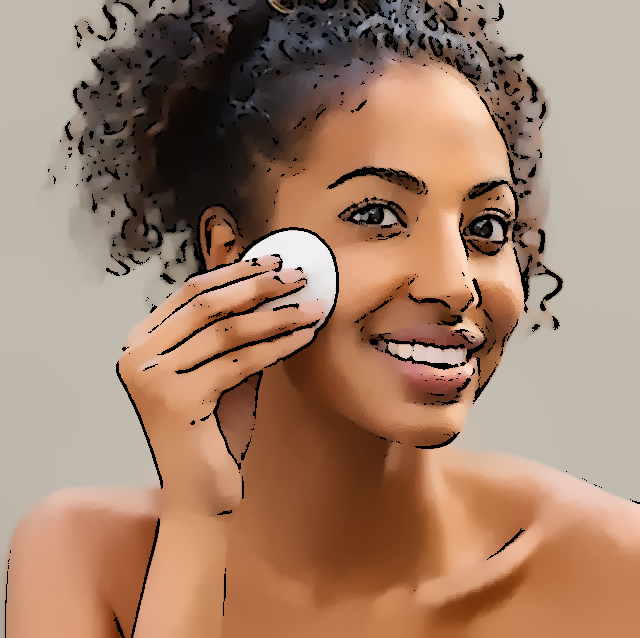

In [21]:
edges1 = cv2.bitwise_not(cv2.Canny(img, 100, 200)) # for thin edges and inverting the mask obatined
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5) # applying median blur with kernel size of 5
edges2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 7) # thick edges
dst = cv2.edgePreservingFilter(img, flags=2, sigma_s=64, sigma_r=0.25) # you can also use bilateral filter but that is slow
# flag = 1 for RECURS_FILTER (Recursive Filtering) and 2 for  NORMCONV_FILTER (Normalized Convolution). NORMCONV_FILTER produces sharpening of the edges but is slower.
# sigma_s controls the size of the neighborhood. Range 1 - 200
# sigma_r controls the how dissimilar colors within the neighborhood will be averaged. A larger sigma_r results in large regions of constant color. Range 0 - 1
cartoon1 = cv2.bitwise_and(dst, dst, mask=edges1) # adding thin edges to smoothened image
cartoon2 = cv2.bitwise_and(dst, dst, mask=edges2) # adding thick edges to smoothened image

cv2_imshow(img)
cv2_imshow(cartoon1)
cv2_imshow(cartoon2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Pencil Sketch filter

In [22]:
# import cv2
# from google.colab import files
# uploaded = files.upload()
# img = cv2.imread('face.jpg')

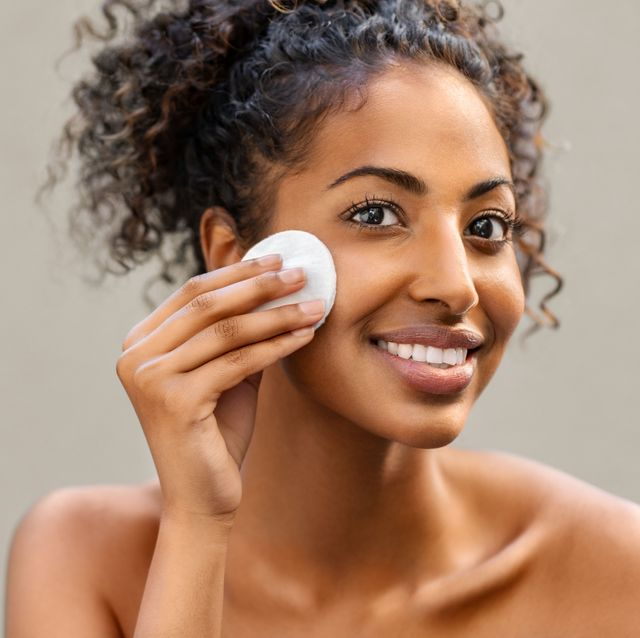

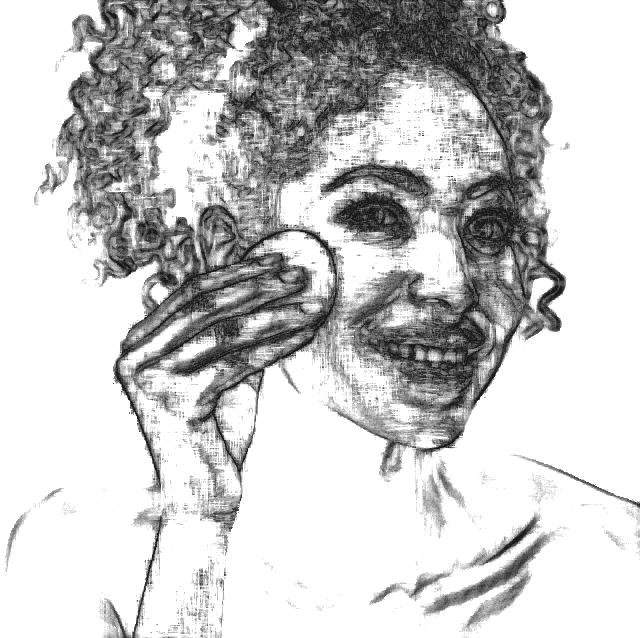

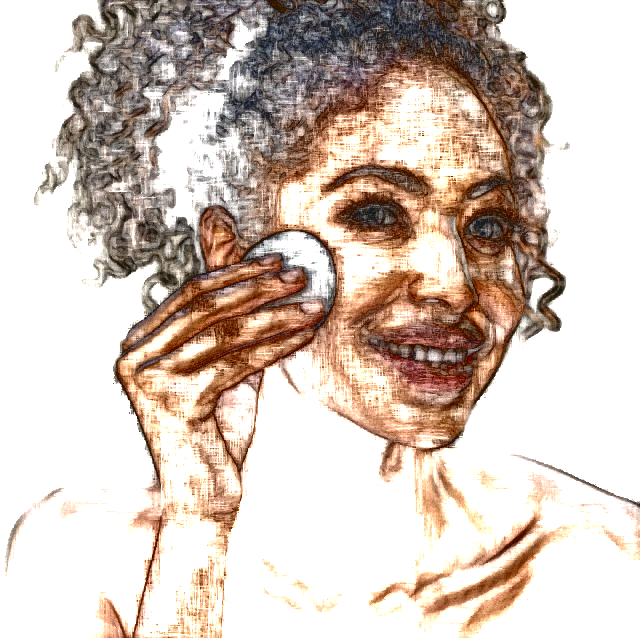

In [23]:
dst_gray, dst_color = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.05) # inbuilt function to generate pencil sketch in both color and grayscale
# sigma_s controls the size of the neighborhood. Range 1 - 200
# sigma_r controls the how dissimilar colors within the neighborhood will be averaged. A larger sigma_r results in large regions of constant color. Range 0 - 1
# shade_factor is a simple scaling of the output image intensity. The higher the value, the brighter is the result. Range 0 - 0.1
cv2_imshow( img)
cv2_imshow(dst_gray)
cv2_imshow( dst_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Hough Transform For Circles

In [49]:
import cv2
import numpy as np

from google.colab import files
uploaded = files.upload()
img = cv2.imread('v.jpg',0)

Saving v.jpg to v (3).jpg


In [ ]:
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv2_imshow(cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()